<img src="https://communications.univie.ac.at/fileadmin/_processed_/csm_Uni_Logo_2016_2f47aacf37.jpg" 
     alt="Logo Universität Wien" 
     width="200"/>

# Practical Machine Learning for Natural Language Processing - 2023 SS  

### Assigment 2 - Generators and Classes   

In this assigment we are going to play with generators and instances/classes - structures that retain state.  

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from itertools import chain

### 1. Alea Iacta Est  

(a) Using [generator functions](https://github.com/rsouza/Python_Course/blob/master/Notebooks/Python_Basic/03_Functions.ipynb), create an object that emulates an eight-sided dice (1-8) that is biased, such that the probability of this generator function returning a certain value is proportional to the value itself (i.e. the face "6" is 3 times more likely to come out than face "2");  

 <img src="https://cdn11.bigcommerce.com/s-70184/images/stencil/608x608/products/532/7428/d8-dice-blue__64321.1664335674.jpg" alt="8-Dice" style="width:250px;height:300px;"> 

(b) Using [Matplotlib](https://matplotlib.org/) plt.plot or plt.hist commands, show graphically the result of 10000 casts of the die;  

(c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8) have been cast at least once. In this case, it will return the total absolute time that has elapsed since the first iteration.  (hint: a function can have both **return** and **yield** commands)  

In [2]:
dicey = ()
for i in range(1,9):
    dicey = np.append(dicey,np.repeat(i,i))

dicey

array([1., 2., 2., 3., 3., 3., 4., 4., 4., 4., 5., 5., 5., 5., 5., 6., 6.,
       6., 6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8., 8.,
       8., 8.])

In [3]:
# a)
def dice():
    while True:
        yield(np.random.choice(dicey)) #the probability to land a certain number equals to its reversed number, so 1 == .1, 4 == .4
        

In [ ]:
# b) Visualizing

[8.0, 6.0, 7.0, 5.0, 8.0, 8.0, 8.0, 6.0, 6.0, 8.0, 6.0, 6.0, 7.0, 5.0, 8.0, 4.0, 6.0, 7.0, 5.0, 7.0]


(array([ 30.,  51.,  82., 116., 143., 161., 197., 220.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <BarContainer object of 8 artists>)

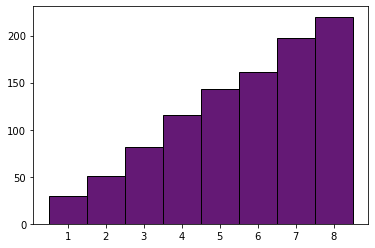

In [38]:
#first, i save the values in a list
dice1 = dice()
dice_trials1000 = [next(dice1) for i in range(1000)]
print(dice_trials1000[0:20])
#then plot:
plt.hist(dice_trials1000, bins=np.arange(1,10)-0.5, color="#641975", ec="k")

In [ ]:
# c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8)
#have been cast at least once. In this case, it will return the total absolute time that has elapsed
#since the first iteration.

2

In [153]:
def diceII():
    now = []
    counts = np.zeros(8)
    while not all(counts) >= 1:
        now.append(time.time())
        random_n = int(np.random.choice(dicey))
        counts[random_n-1] += 1
        yield(random_n)
    return time.time() - now[0]

In [157]:
dice2 = diceII()
dice2_trials = []
while True:
    dice2_trials.append(next(dice2))

StopIteration: 0.015623807907104492

In [158]:
print(len(dice2_trials))

111


### 2. A ticket to the first Class    

+ Create a Class called "Elevator". Each instance of this class receives as parameters the number of floors in the building and starts the elevator on the lowest floor.  
+ This Class should have methods and properties to allow the elevator to:
<br></br>
    + Receive a call - user(s) press a button to go to specific floor(s);  
    + Receive a floor as a destination - when users enter the elevator, each one may press a button to choose destination floor;  
    + Store and inform which floor the elevator is at each moment(consider that trips for consecutive floors takes 5 seconds, and stopping takes 10 seconds);  
    + Store and inform which users are in the elevator;  
    + Store and inform the sequence of floors yet to be visited;  
    + Store the number of times the elevator stopped in each floor (passing through the floor without "stopping" on the floor does not count);  
    + Refuses commands to go to inexistent floors.  
<br></br>
+ Simulate the behavior of the elevator serving ten users, each one calling from a random floor, and chosing a random destination floor.   
+ Graphically illustrate the current elevator position for the requested simulation.   
+ (BONUS) Create a smart building simulator, controlling calls made to n > 1 elevators and routing elevator properly.  

In [10]:
class MyElevator:
    def __init__(self,floors_min,floors_max):
        self.n_floors = [floors_min,floors_max,floors_max-floors_min+1]
        self.current_elev_floor = floors_min
        #self.users = []
        self.users_inelev = []
        self.not_visited_floors = []
        self.floors_visited = np.column_stack((np.arange(floors_min,floors_max+1),np.zeros(self.n_floors[-1])))
        
    
    def user(self,customer, print_features = True, plot_fig = True):
        for u in customer:
            if len(u) != 3:
                raise ValueError("object must be a list of tuples with 3 elements")
                        
        self.users = customer
        
        for u in self.users:
            self.not_visited_floors.append((u[1],u[2]))
        
            if u[2] < self.n_floors[0] or u[2] > self.n_floors[1] or u[1] < self.n_floors[0] or u[1] > self.n_floors[1]:
                raise ValueError("Hola my friend, you're travelling too far! The building has not yet that many floors!")

        print("current floor: " + str(Elevator_sim1.current_elev_floor))
        print(f"Not visited floors: {Elevator_sim1.not_visited_floors}") 
        print(f"Users: {Elevator_sim1.users}")
        print(f"Users in elevator: {Elevator_sim1.users_inelev}")
        
        x_rounds = []
        xx = 0
        y_levels = []
        while len(self.not_visited_floors) > 0:  
            users_inelev_before = len(self.users_inelev)
            xx += 1
            
            for a,user in enumerate(self.users):  #put the user into elevator or remove if theay are leaving

                if user[0] not in self.users_inelev and user[1] == self.current_elev_floor:
                    self.users_inelev.append(user[0])
                    self.not_visited_floors[a] = [self.not_visited_floors[a][1]]
                    
                elif user[0] in self.users_inelev and user[2] == self.current_elev_floor:
                    self.users_inelev.remove(user[0])
                    self.users.remove(user)
                    self.not_visited_floors.remove(self.not_visited_floors[a])
            
            if users_inelev_before != len(self.users_inelev):
                self.floors_visited[self.current_elev_floor,1] += 1
                time.sleep(10)
            elif self.current_elev_floor != self.not_visited_floors[0][0]:
                time.sleep(5)
            
            if print_features == True:
                print("current floor: " + str(Elevator_sim1.current_elev_floor))
                print(f"Not visited floors: {Elevator_sim1.not_visited_floors}") 
                print(f"Users: {Elevator_sim1.users}")
                print(f"Users in elevator: {Elevator_sim1.users_inelev}")
                
            if plot_fig == True:
                x_rounds.append(xx)
                y_levels.append(self.current_elev_floor)
                #plt.figure()
                plt.bar(x_rounds,y_levels, color="orange")
                plt.ylim([self.n_floors[0],self.n_floors[1]])
                plt.xlabel("Floor")
                plt.show()
            

            if len(self.not_visited_floors) == 0:
                break
                
            if self.current_elev_floor < self.not_visited_floors[0][0]:
                self.current_elev_floor += 1

            elif self.current_elev_floor > self.not_visited_floors[0][0]:
                self.current_elev_floor -= 1
            else:
                continue

        
        time.sleep(5*self.current_elev_floor)
        self.current_elev_floor = 0
        #self.floors_visited[self.current_elev_floor,1] += 1
        if plot_fig == True:
            x_rounds.append(xx)
            y_levels.append(self.current_elev_floor)
            #plt.figure()
            plt.bar(x_rounds,y_levels, color="orange")
            plt.ylim([self.n_floors[0],self.n_floors[1]])
            plt.xlabel("Floor")
            plt.show()
        print("No customers in the elevator")


In [11]:
user_list=[]
for i in ("Aang","Katara","Sokka","Zuko","Toph","Uncle Iroh","Appa","Momo","Suki","Azula"):
    user_list.append((i,np.random.randint(0,9),np.random.randint(0,9)))
user_list

[('Aang', 7, 8),
 ('Katara', 5, 4),
 ('Sokka', 1, 0),
 ('Zuko', 0, 2),
 ('Toph', 4, 5),
 ('Uncle Iroh', 3, 1),
 ('Appa', 3, 6),
 ('Momo', 4, 6),
 ('Suki', 6, 5),
 ('Azula', 4, 5)]

current floor: 0
Not visited floors: [(7, 8), (5, 4), (1, 0), (0, 2), (4, 5), (3, 1), (3, 6), (4, 6), (6, 5), (4, 5)]
Users: [('Aang', 7, 8), ('Katara', 5, 4), ('Sokka', 1, 0), ('Zuko', 0, 2), ('Toph', 4, 5), ('Uncle Iroh', 3, 1), ('Appa', 3, 6), ('Momo', 4, 6), ('Suki', 6, 5), ('Azula', 4, 5)]
Users in elevator: []


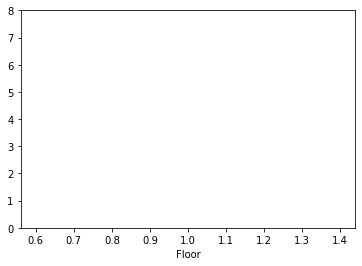

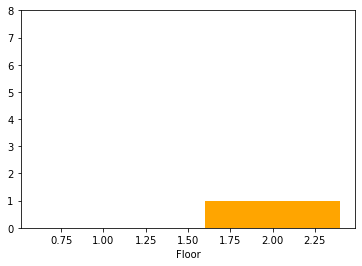

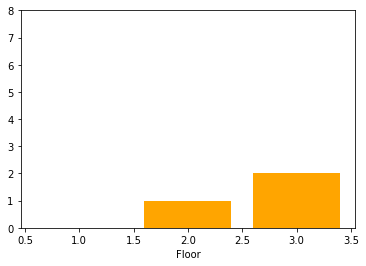

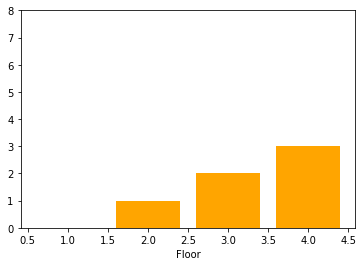

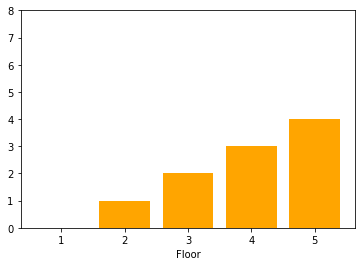

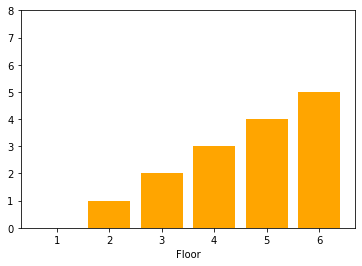

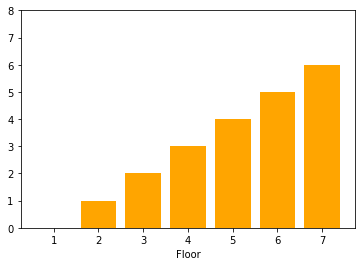

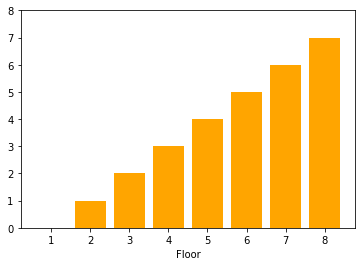

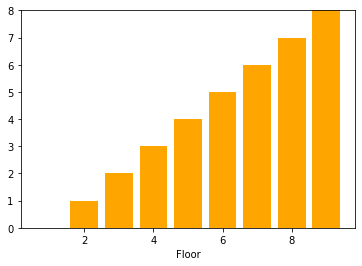

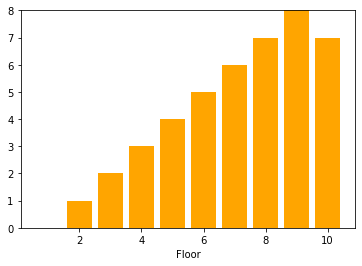

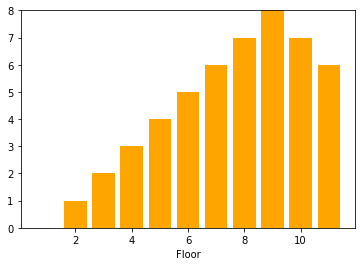

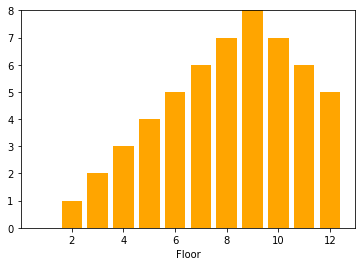

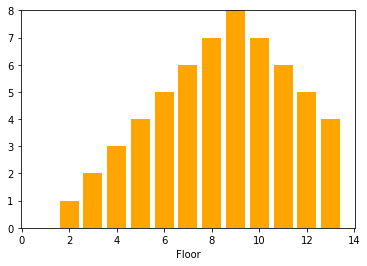

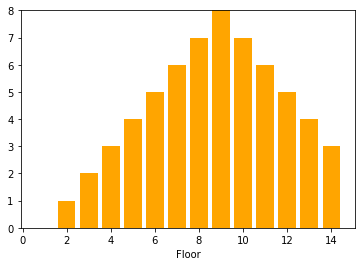

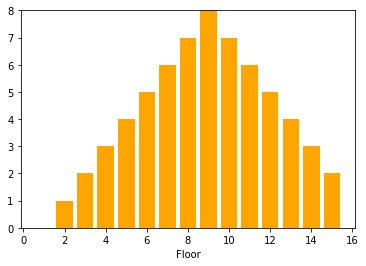

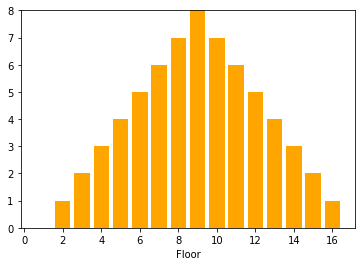

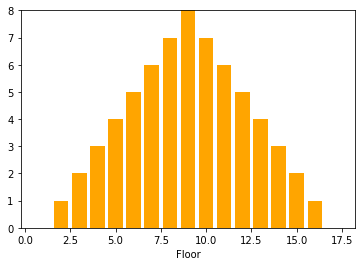

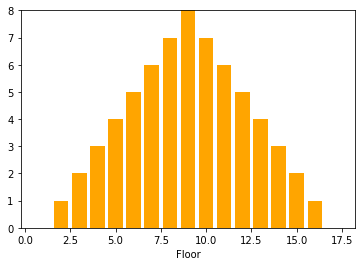

No customers in the elevator


In [12]:
Elevator_sim1 = MyElevator(0,8)
Elevator_sim1.user(user_list,False)

In [13]:
Elevator_sim1.floors_visited  #1. column = floor, 2. column = count visits

array([[0., 2.],
       [1., 2.],
       [2., 1.],
       [3., 1.],
       [4., 2.],
       [5., 2.],
       [6., 1.],
       [7., 1.],
       [8., 1.]])